<a href="https://colab.research.google.com/github/bee-llel/Machine-Learning/blob/master/Assignment_4_nearly_finished.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Assignment 4 : Predict Blood Donations

Our dataset is from a mobile blood donation vehicle in Taiwan. The Blood Transfusion Service Center drives to different universities and collects blood as part of a blood drive. We want to predict whether or not a donor will give blood the next time the vehicle comes to campus. <br>
Data is courtesy of Yeh, I-Cheng via the [UCI Machine Learning repository](https://archive.ics.uci.edu/ml/datasets/Blood+Transfusion+Service+Center).

The dataset contains the following variables:
* Months since Last Donation: this is the number of monthis since this donor's most recent donation.
* Number of Donations: this is the total number of donations that the donor has made.
* Total Volume Donated: this is the total amound of blood that the donor has donated in cubuc centimeters.
* Months since First Donation: this is the number of months since the donor's first donation.

Your goal is to predict the last column, which is whether the donor donated blood in March 2007.

In [121]:
# import necessary libraries 
# imports
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import sklearn as sk

1-1 load the "transfusion.data" dataset into a dataframe variable called df. Print the shape, head of df

In [122]:
# your code here
df = pd.read_csv("transfusion.data" )
df.head(10)

,Recency (months),Frequency (times),Monetary (c.c. blood),Time (months),whether he/she donated blood in March 2007
0,2,50,12500,98,1
1,0,13,3250,28,1
2,1,16,4000,35,1
3,2,20,5000,45,1
4,1,24,6000,77,0
5,4,4,1000,4,0
6,2,7,1750,14,1
7,1,12,3000,35,0
8,2,9,2250,22,1
9,5,46,11500,98,1


1-2 Rename df columns to the following: `['Recency', 'Frequency', 'Volume', 'Time', 'Target']`, then print some info about df

In [123]:
# your code here
df.columns = ['Recency', 'Frequency', 'Volume', 'Time', 'Target']
df.head()

,Recency,Frequency,Volume,Time,Target
0,2,50,12500,98,1
1,0,13,3250,28,1
2,1,16,4000,35,1
3,2,20,5000,45,1
4,1,24,6000,77,0


## Data Exploration

2- Plot a **bar plot** of the column **Target** (% of each class). How much accuracy can you get if prediction is always equal to "*0*" ?

In [124]:
# I think i understand the question this time
# it is too see how unbalanced our data is ?
#as if we have let's say 50% accuracy for 0, our dataset is balanced.

percentage of donator = 0.23796791443850268
we can see that our data is not balanced which is to be expected as blood donor are not that common


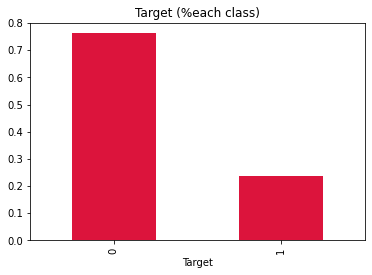

In [125]:
# let's reuse our barplot function from last assignement 
%matplotlib inline
import matplotlib.pyplot as plt
print ('percentage of donator =', df['Target'].mean())
(df.groupby('Target').size()/df.shape[0]).plot(kind="bar",title="Target (%each class)", color = "crimson")
print("we can see that our data is not balanced which is to be expected as blood donor are not that common")


3-1 Print the [Correlation matrix](https://en.wikipedia.org/wiki/Correlation_and_dependence#Correlation_matrices) of df.

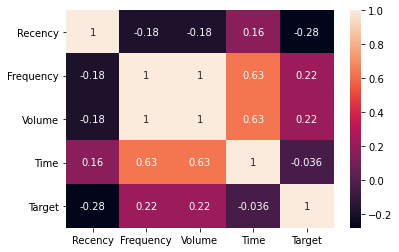

In [126]:
# The correlation matrix will show the correlation
# i used seaborn to print the coorelation matrix as i found it to be easy to read.
import seaborn as sns
corrMatrix = df.corr()
sns.heatmap(corrMatrix, annot=True)
plt.show()

3-2 Which are the 2 most correlated variables, make a scatter plot of them. Could you guess how much blood is donated each time ?

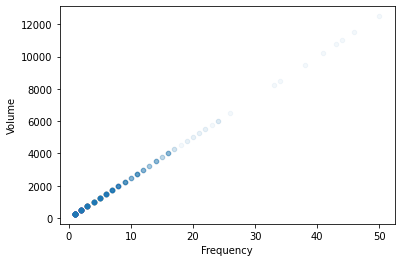

In [127]:
#sn.relplot(data = corrMatrix)
#we can see the two most correlated variables are 'Frequency' and 'Volume' which have a correlation of 100%
col = ['Frequency','Volume']
df.plot(kind = 'scatter', x ='Frequency' , y = 'Volume', alpha = 0.05)

In [128]:
print("250 cubic centimeter per person because if we divide the volume of blood given by a donor") 
print("by the frequency at which he came, we always have 250 ( which is further shown in the linear scatter plot")

250 cubic centimeter per person because if we divide the volume of blood given by a donor
by the frequency at which he came, we always have 250 ( which is further shown in the linear scatter plot


3-3 Remove one of the two most correlated variables above. The choice should have no consequence for the rest, but to have the same results among all students, remove the column with the shortest name (small number of letters)

In [129]:
# your code here
df.drop('Volume',axis = 1,inplace = True)
df.head()

,Recency,Frequency,Time,Target
0,2,50,98,1
1,0,13,28,1
2,1,16,35,1
3,2,20,45,1
4,1,24,77,0


## Model Training & Evaluation

4- Load the target variable into a dataframe and call it y. Then, load the features into a second dataframe and call it X. Fit a logistic model using cross validation. Use 5 folds and print the average accuracy

In [130]:
# y dataframe containing the taget
y = df['Target']
X = df.drop('Target',axis = 1)
print(X.head())
print(y.head())

   Recency  Frequency  Time
0        2         50    98
1        0         13    28
2        1         16    35
3        2         20    45
4        1         24    77
0    1
1    1
2    1
3    1
4    0
Name: Target, dtype: int64


In [131]:
# use sklearn + creating training set
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
X_train,X_test ,y_train, y_test = train_test_split(X,y, test_size = 0.3, random_state = 11)
clf_log = LogisticRegression(random_state=11)
clf_log.fit(X_train,y_train)
# cross validation
scores_log = cross_val_score(clf_log, X, y, scoring='accuracy', cv=5)
print('cross validation accuracy =', scores_log)
print(scores_log.mean())

cross validation accuracy = [0.76       0.76       0.75333333 0.82550336 0.76510067]
0.7727874720357942


5- Fit a RandomForestClassifier [RandomForestClassifier](http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html) using cross validation. Use 5 folds and print the average accuracy. <br>
Set random_state=1 and play around the other parameters manually to improve the score

In [144]:
# importing a forest
from sklearn.ensemble import RandomForestClassifier
# i played a bit and put some random parameter, can't get him above 76.2% accuracy even with some million leaf
#it's as if no manual random configuration can get above 76% which is bad considering logistic regression got us 77% 
clf_rf = RandomForestClassifier(random_state=1,n_estimators=2, max_depth=1, min_samples_leaf=1000000,  min_samples_split = 11)
clf_rf.fit(X_train,y_train)
scores_rf = cross_val_score(clf_rf, X, y, scoring='accuracy', cv=5)
print(scores_rf)
print('cross validation accuracy =', scores_rf.mean())

[0.76       0.76       0.76       0.76510067 0.76510067]
cross validation accuracy = 0.7620402684563758


6- So far, you were told to leave all the parameters to default values, let's now optimize some of them using GridSearchCV. <br>
Search the following parameters in the given values (**This may take a while**):
* min_samples_leaf: [1, 4, 7]
* min_samples_split: [2, 4, 6, 8, 10]
* n_estimators: [20, 30, 40]
* max_depth: [2,3]

In [146]:
from sklearn.model_selection import GridSearchCV
params = {'min_samples_leaf':[1, 4, 7],'min_samples_split':[2, 4, 6, 8, 10],
          'n_estimators':[20, 30, 40], 'max_depth': [2,3]}
clf_rf2 = RandomForestClassifier(random_state=1)
clf_gs = GridSearchCV(clf_rf2, params, scoring = 'accuracy',cv=5)
clf_gs.fit(X_train,y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False, random_state=1,
                                   

7- Print the best score, and the best parameters

In [147]:
# bbest score
clf_gs.best_score_

0.7629120879120879

In [148]:
# best parameter
clf_gs.best_params_

{'max_depth': 3,
 'min_samples_leaf': 1,
 'min_samples_split': 4,
 'n_estimators': 30}

8- Build a dataframe containing the importance of each feature. Sort it from the most important to the least one.

In [153]:
clf_rf3 = RandomForestClassifier(random_state=1, max_depth = 3, min_samples_leaf = 1, min_samples_split =4, n_estimators = 30 ) 
clf_rf3.fit(X_train, y_train)
#freshly imported from the course 
feat_imp = pd.DataFrame(clf_rf3.feature_importances_, X.columns, columns=['Importance'])
feat_imp.sort_values('Importance', ascending=False)

,Importance
Frequency,0.409623
Recency,0.398483
Time,0.191894


In [154]:
scores_rf3 = cross_val_score(clf_rf3, X, y, scoring='accuracy', cv=5)
print(scores_rf3)
print('cross validation accuracy =', scores_rf3.mean())

[0.81333333 0.76       0.76       0.75167785 0.76510067]
cross validation accuracy = 0.7700223713646531


9- **Feature engineering**: Try to improve the *RandomForestClassifier* by adding engineered features and using 5 fold grid search for parameter tuning. Print the best score and the best parameters.   
**Hint**: You can achieve 78,6 % accuracy or higher.

In [ ]:
# your code here
clf_rf2 = # your code here
clf_gs = # your code here
# your code here
print(# your code here)
print(# your code here)

10- Always in the same setting (5 fold grid search), try different ensemble models from [sklearn](http://scikit-learn.org/stable/modules/ensemble.html#ensemble) in order to get the highest accuracy. Print the best score

In [ ]:
# your code here